In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dm
import os

__version__ = '2020.8.11.16'


In [7]:
# Change it to the directory that you put the image file in.
path_to_image_folder = '../0QIU/images/'

image_file_names = os.listdir(path_to_image_folder)
image_file_paths = []
for i, f in enumerate(image_file_names):
    image_file_paths.append(os.path.join(path_to_image_folder + f))
image_file_paths[1:10]

FileNotFoundError: [Errno 2] No such file or directory: '../0QIU/images/'

In [24]:
df = pd.read_csv('label.csv')
df.head()

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,6d317b3d6,1,0,0,0,0,1
1,ab3c1fad5,1,0,0,0,0,1
2,df8281674,1,0,0,0,1,0
3,ed3db322c,1,0,1,0,0,0
4,39a1e36d9,1,0,1,0,0,0


In [4]:
# Amoung 8898 images of CT scan, 3000 of them don't have disease
df[df['any'] == 0]['ID'].count()

3000

In [2]:
image_file_paths = [
    '../../../0Qiu/images/ID_fc9c6a4b0.dcm',
    '../../../0QIU/images/ID_ebbb9f664.dcm',
     '../../../0QIU/images/ID_254206f97.dcm',
     '../../../0QIU/images/ID_c0a27d21b.dcm',
     '../../../0QIU/images/ID_ab60e2db8.dcm',
     '../../../0QIU/images/ID_d70ef0c4a.dcm',
     '../../../0QIU/images/ID_02033e6df.dcm',
     '../../../0QIU/images/ID_adcc347b9.dcm',
    
]

In [3]:
dm.dcmread(image_file_paths[0])

NameError: name 'dm' is not defined

In [4]:
images = []
a = 0
for f in image_file_paths:
    a += 1
    if not os.path.isfile(f):
        print('Skipped one')
        continue
    image = dm.dcmread(f)

#     数据有坑！！！！！
#     It's really really really strange, that those data are in lists...
    if isinstance(image.WindowCenter, dm.multival.MultiValue):
        image.WindowCenter = image.WindowCenter[0]
        image.WindowWidth = image.WindowWidth[0]

    arr_hu = float(image.RescaleSlope) * image.pixel_array + float(image.RescaleIntercept)

    v_min = float(image.WindowCenter) - 0.5 * float(image.WindowWidth)
    v_max = float(image.WindowCenter) + 0.5 * float(image.WindowWidth)
    
    print(f'RescaleSlope:{image.RescaleSlope}  WindowCenter:{image.WindowCenter}   WindowWidth:{image.WindowWidth}   RescaleSlope{image.RescaleSlope}    RescaleIntercept:{image.RescaleIntercept}\n\n')
    
    arr_hu_win = arr_hu.copy()

#     Make the image array from 0 - 1
    arr_hu_win[arr_hu < v_min] = v_min
    arr_hu_win[arr_hu > v_max] = v_max
    arr_hu_win = (arr_hu_win - v_min) / (v_max - v_min)

    images.append(arr_hu_win)
    if a == 3: break
# dm.read_file(image_file_paths[0]).SeriesInstanceUID[3:] in df['ID']

NameError: name 'os' is not defined

In [5]:
np.min(images[0])

NameError: name 'np' is not defined

In [6]:
# df['ID']
# len(images)

In [7]:
dm.dcmread(image_file_paths[0]).PatientID

'ID_9615adb2'

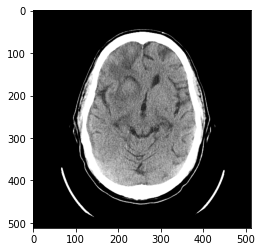

In [8]:
plt.imshow(images[0], cmap='gray')

In [12]:
df[df['ID'] == '2393dec98']

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
2142,2393dec98,1,0,1,0,0,1


In [310]:
# # export
# for i, image in enumerate(images):
#     plt.imsave(os.path.join('images', image_file_names[i][:-4] + '.jpg'), image)

In [25]:
df['any'] = df['any'].apply(lambda e: 101 if e == 1 else 0)
df['any'] = df['any'].apply(lambda e: 1 if e == 0 else e)
df['any'] = df['any'].apply(lambda e: 0 if e == 101 else e)

In [28]:
from sklearn.utils import shuffle as s

df = s(df)


In [30]:
df = s(df)

In [31]:
df

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
4454,ddfd01922,0,0,1,0,1,0
6575,8bbeadb92,1,0,0,0,0,0
3433,6758322dc,0,0,0,1,1,0
1259,e19bf5ed4,0,1,0,0,0,0
2940,de2479320,0,0,1,1,1,0
...,...,...,...,...,...,...,...
1614,7c55ff8b2,0,1,0,0,0,0
3998,3f8fde56e,0,0,0,0,1,0
4464,0db5e2d33,0,0,0,0,1,0
6448,2fceb0d09,1,0,0,0,0,0
